In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load the data

data = pd.read_csv('/content/Tesla Deaths - Deaths (3).csv')

# Display the first few rows and the column names of the dataset to understand its structure
print(data.head())
print(data.columns)

   Case #  Year       Date   Country   State   \
0     254  2022  8/16/2022   Germany      NaN   
1     253  2022  8/15/2022       USA       CA   
2     252  2022  8/14/2022   Finland      NaN   
3     251  2022   8/2/2022       USA       FL   
4     250  2022  7/27/2022       USA       ME   

                            Description    Deaths   Tesla driver   \
0    Tesla car crashes into tree, burns          2            NaN   
1     Tesla veers into oncoming traffic          4              1   
2     Unlicensed driver hits pedestrian          1             -    
3   Man in wheelchair hit crossing road          1             -    
4           Tesla crashes at high speed          1              1   

   Tesla occupant   Other vehicle   ...  TSLA+cycl / peds   Model   \
0              NaN              -   ...                  2     NaN   
1                3              -   ...                  4     NaN   
2               -               -   ...                  1     NaN   
3         

In [30]:
# Strip any leading/trailing whitespace from the column names
data.columns = data.columns.str.strip()

# Display the cleaned column names
print(data.columns)

# Define the target variable and features
target = 'Deaths'
features = data.columns.drop(target)

Index(['Case #', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'AutoPilot claimed',
       'Verified Tesla Autopilot Death', 'Source', 'Note', 'Deceased 1',
       'Deceased 2', 'Deceased 3', 'Deceased 4'],
      dtype='object')


In [23]:
# Define the target and features
X = data[features]
y = data[target]

# Convert date columns to datetime and then to numeric (timestamp)
for col in X.columns:
    if pd.api.types.is_string_dtype(X[col]):
        try:
            X[col] = pd.to_datetime(X[col])
        except ValueError:
            pass

# Convert datetime columns to numeric (timestamp)
for col in X.select_dtypes(include=['datetime']):
    X[col] = X[col].astype(int) / 10**9  # Convert to seconds


<ipython-input-23-c8412541bb27>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_datetime(X[col])
<ipython-input-23-c8412541bb27>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col])
<ipython-input-23-c8412541bb27>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col])
<ipython-input-23-c8412541bb27>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dat

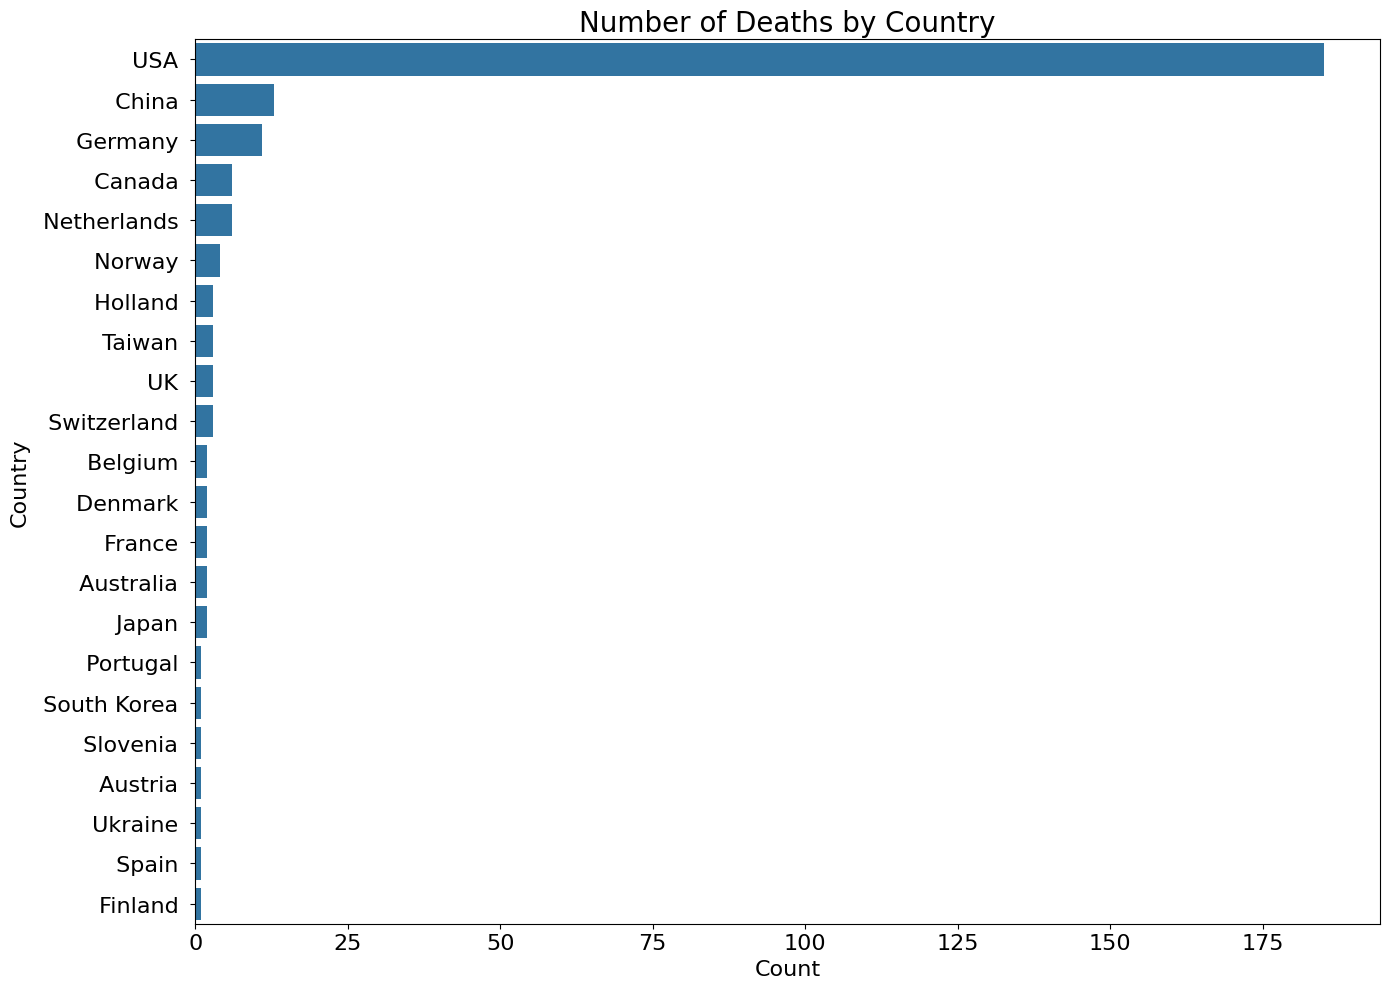

In [35]:
import matplotlib.pyplot as plt  # Import the matplotlib library
import seaborn as sns  # Import the seaborn library
#Number of deaths by Country
plt.figure(figsize=(14,10))
sns.countplot(y=data['Country'], order=data['Country'].value_counts().index)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.title('Number of Deaths by Country', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

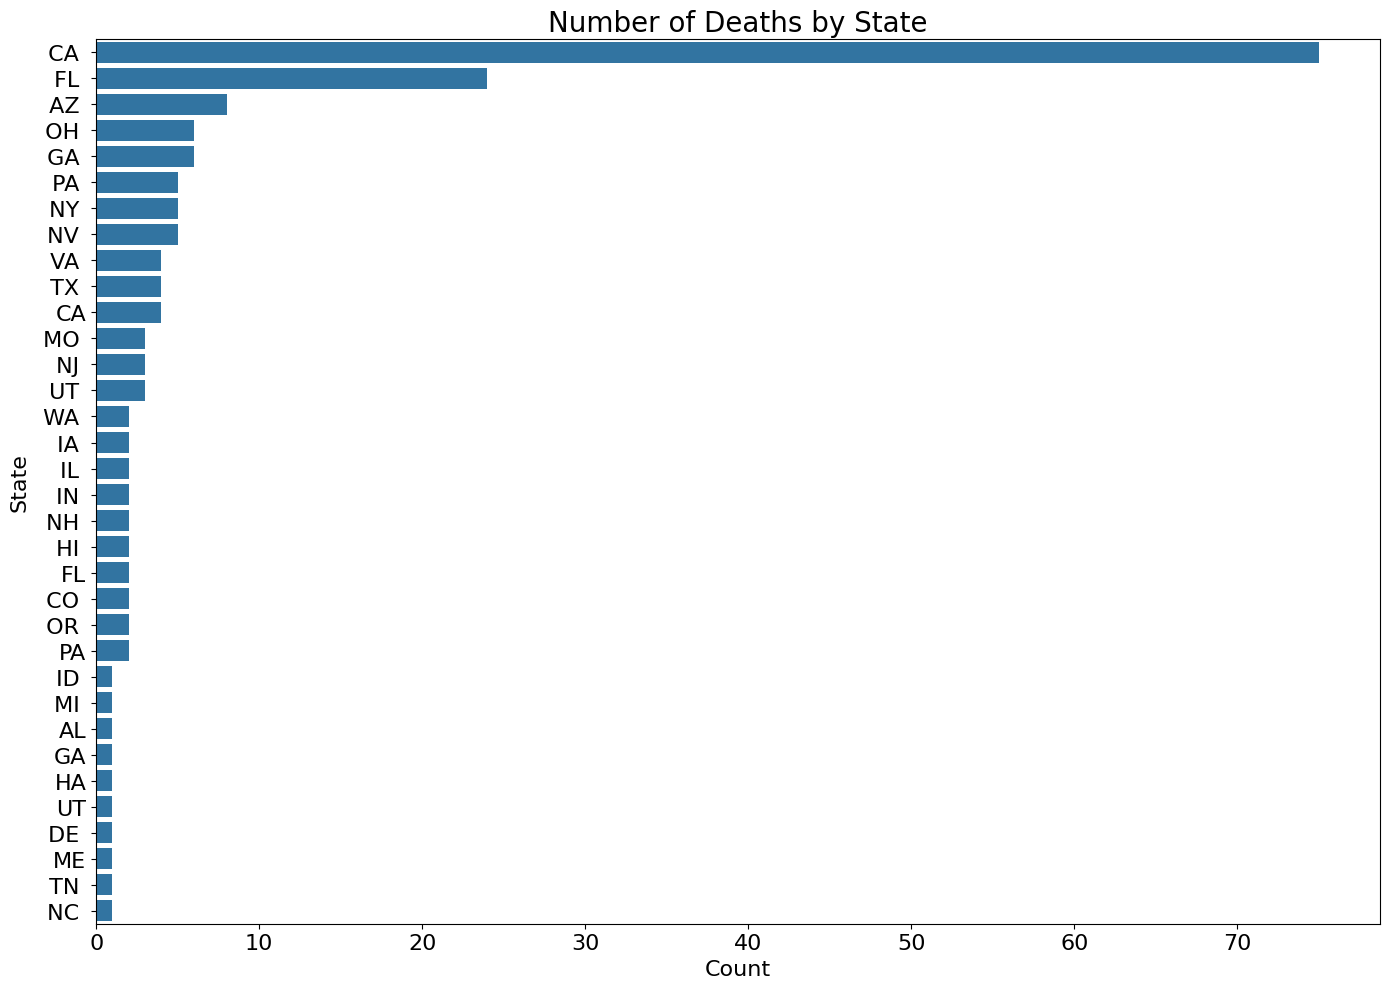

In [37]:
#Number of deaths by State in USA
plt.figure(figsize=(14,10))
sns.countplot(y=data['State'], order=data['State'].value_counts().index)
plt.xlabel('Count', fontsize=16)
plt.ylabel('State', fontsize=16)
plt.title('Number of Deaths by State', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

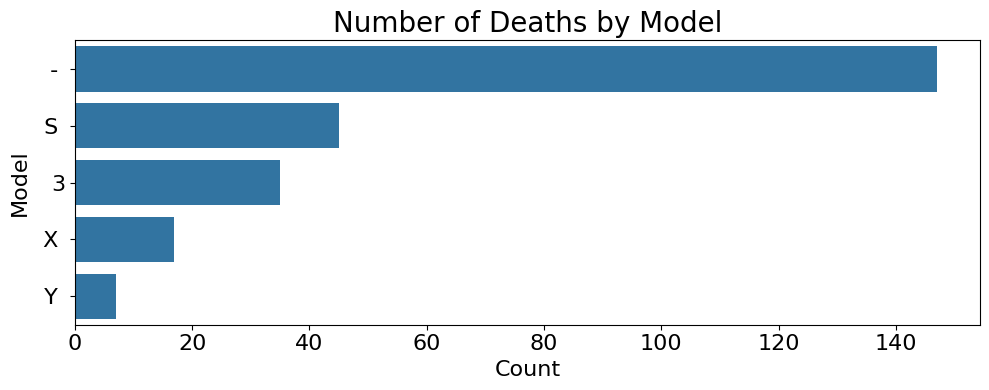

In [46]:
#Number of death that by each model
plt.figure(figsize=(10,4))
sns.countplot(y=data['Model'], order=data['Model'].value_counts().index)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Model', fontsize=16)
plt.title('Number of Deaths by Model', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

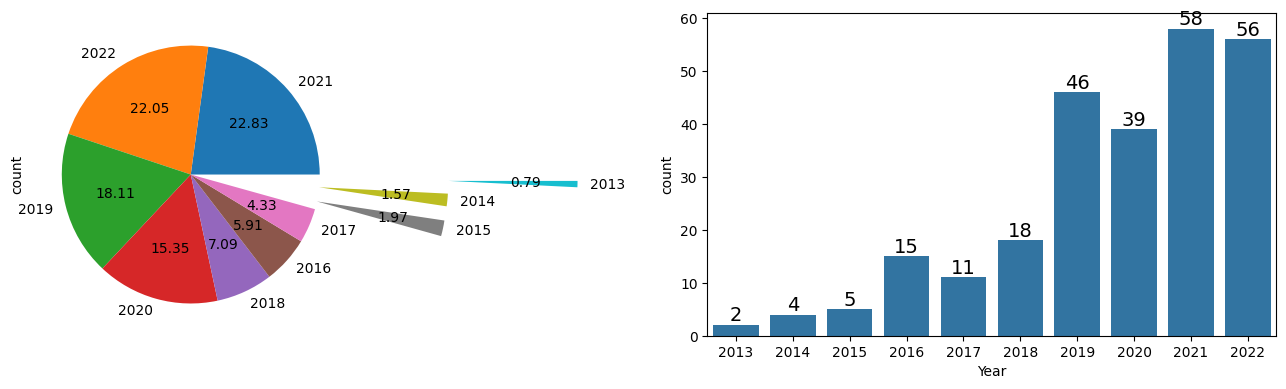

In [42]:
#Number of accidents per year that appear in the data,
fig,ax = plt.subplots(1,2,figsize=(14,4))
data['Year'].value_counts().plot.pie(autopct='%.2f',ax=ax[0], explode=(0,0,0,0,0,0,0,1,1,2))
sns.countplot(x=data['Year'],ax=ax[1])
for i in ax[1].containers:
    ax[1].bar_label(i, fontsize=14)
plt.tight_layout()
plt.show()

In [43]:
# Convert categorical features to dummy variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle any remaining missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


In [44]:
# Use the imputer's feature names to get the correct columns after imputation
X_columns = imputer.get_feature_names_out()
X = pd.DataFrame(X_imputed, columns=X_columns)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9090909090909091
Confusion Matrix:
[[70  0  0]
 [ 4  0  0]
 [ 3  0  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        70
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.91        77
   macro avg       0.30      0.33      0.32        77
weighted avg       0.83      0.91      0.87        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
